In [2]:
# CELL 1 – Imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import joblib

print("All imports successful!")


All imports successful!


In [3]:
# CELL 2 – Load and inspect quiz data
csv_path = "../data/quiz/quiz_samples.csv"
quiz_df = pd.read_csv(csv_path)

print("Dataset shape:", quiz_df.shape)
print("\nFirst few rows:")
quiz_df.head()


Dataset shape: (10, 4)

First few rows:


,question,answer,topic,difficulty
0,What is a variable in Python?,A named reference to a value stored in memory.,Python basics,easy
1,What does the len() function do in Python?,"It returns the length of an object, like a lis...",Python basics,easy
2,What is a list in Python?,"An ordered, mutable collection of items.",Python basics,easy
3,What is logistic regression used for?,For binary or multi-class classification tasks.,Machine Learning basics,medium
4,What is overfitting in machine learning?,When a model learns noise and performs poorly ...,Machine Learning basics,medium


In [4]:
# CELL 3 – Rename columns to standard names
quiz_df = quiz_df.rename(columns={
    quiz_df.columns[0]: "question",
    quiz_df.columns[1]: "answer",
    quiz_df.columns[2]: "topic",
    quiz_df.columns[3]: "difficulty"
})

print("Columns:", quiz_df.columns.tolist())
quiz_df.head()


Columns: ['question', 'answer', 'topic', 'difficulty']


,question,answer,topic,difficulty
0,What is a variable in Python?,A named reference to a value stored in memory.,Python basics,easy
1,What does the len() function do in Python?,"It returns the length of an object, like a lis...",Python basics,easy
2,What is a list in Python?,"An ordered, mutable collection of items.",Python basics,easy
3,What is logistic regression used for?,For binary or multi-class classification tasks.,Machine Learning basics,medium
4,What is overfitting in machine learning?,When a model learns noise and performs poorly ...,Machine Learning basics,medium


In [5]:
# CELL 4 – Data cleaning and info
quiz_df["difficulty"] = quiz_df["difficulty"].astype(str).str.lower().str.strip()
quiz_df = quiz_df.dropna(subset=["question", "answer", "topic", "difficulty"])
quiz_df = quiz_df[quiz_df["question"].str.strip() != ""]

print("Cleaned shape:", quiz_df.shape)
print("\nDifficulty distribution:")
print(quiz_df["difficulty"].value_counts())
print("\nTopic distribution:")
print(quiz_df["topic"].value_counts())


Cleaned shape: (10, 4)

Difficulty distribution:
difficulty
easy      5
medium    5
Name: count, dtype: int64

Topic distribution:
topic
Python basics              5
Machine Learning basics    3
Deep Learning basics       2
Name: count, dtype: int64


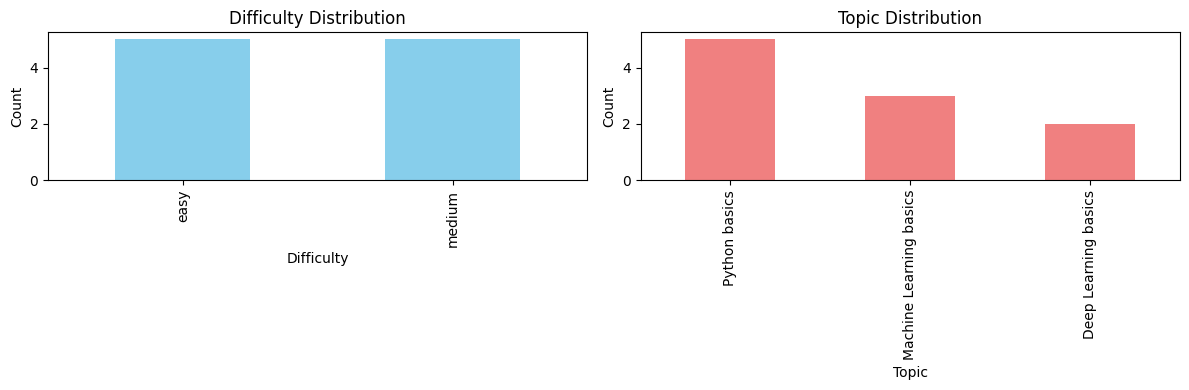

EDA plots saved to data/eda_plots.png


In [6]:
# CELL 5 – Visualize difficulty distribution
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

quiz_df["difficulty"].value_counts().plot(kind="bar", ax=axes[0], color="skyblue")
axes[0].set_title("Difficulty Distribution")
axes[0].set_xlabel("Difficulty")
axes[0].set_ylabel("Count")

quiz_df["topic"].value_counts().plot(kind="bar", ax=axes[1], color="lightcoral")
axes[1].set_title("Topic Distribution")
axes[1].set_xlabel("Topic")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.savefig("../data/eda_plots.png")
plt.show()

print("EDA plots saved to data/eda_plots.png")


In [7]:
# CELL 6 – Train/test split and vectorizer setup
X = quiz_df["question"]
y = quiz_df["difficulty"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set: {len(X_train)}, Test set: {len(X_test)}")

vectorizer = CountVectorizer(
    ngram_range=(1, 2),
    max_features=5000,
    stop_words="english"
)

X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

print(f"Training vector shape: {X_train_vec.shape}")
print(f"Test vector shape: {X_test_vec.shape}")


Training set: 8, Test set: 2
Training vector shape: (8, 32)
Test vector shape: (2, 32)


In [8]:
# CELL 7 – Train logistic regression
clf = LogisticRegression(
    max_iter=1000,
    class_weight="balanced",
    C=0.5,
    solver="liblinear"
)

clf.fit(X_train_vec, y_train)

print("Model trained successfully!")


Model trained successfully!


In [9]:
# CELL 8 – Evaluate model
y_pred = clf.predict(X_test_vec)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(f"\nClassification Report:\n{classification_report(y_test, y_pred)}")
print(f"\nConfusion Matrix:\n{confusion_matrix(y_test, y_pred)}")


Accuracy: 0.00

Classification Report:
              precision    recall  f1-score   support

        easy       0.00      0.00      0.00       1.0
      medium       0.00      0.00      0.00       1.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0


Confusion Matrix:
[[0 1]
 [1 0]]


In [10]:
# CELL 9 – Manual test predictions
test_questions = [
    "What is overfitting in machine learning?",
    "What does the len() function do?",
    "Explain neural networks.",
]

test_vec = vectorizer.transform(test_questions)
predictions = clf.predict(test_vec)

for q, pred in zip(test_questions, predictions):
    print(f"Q: {q}")
    print(f"Predicted difficulty: {pred}\n")


Q: What is overfitting in machine learning?
Predicted difficulty: medium

Q: What does the len() function do?
Predicted difficulty: easy

Q: Explain neural networks.
Predicted difficulty: medium



In [11]:
# CELL 10 – Save model and vectorizer
models_dir = "../backend/models"
os.makedirs(models_dir, exist_ok=True)

model_path = os.path.join(models_dir, "quiz_difficulty_clf.joblib")
vec_path = os.path.join(models_dir, "quiz_vectorizer.joblib")

joblib.dump(clf, model_path)
joblib.dump(vectorizer, vec_path)

print(f"Model saved to: {model_path}")
print(f"Vectorizer saved to: {vec_path}")


Model saved to: ../backend/models\quiz_difficulty_clf.joblib
Vectorizer saved to: ../backend/models\quiz_vectorizer.joblib
